<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 2 - BUSINESS CASES FOR DATA SCIENCE </h1> </center> <br>
<center> MDSAA 2021/2022 </center>

**Table of Contents** <br>
* [1) Imports](#imports)
    * [1.1) Import Libraries](#importlibraries)
    * [1.2) Import Dataset](#importdataset)
* [2) Data Exploration](#dataexploration)
    * [2.1) Descriptive Statistics](#descriptivestatistics)
    * [2.2) Check Duplicates and Missing Values](#checkdupandmv)
    * [2.3) Check Data Types](#checkdatatypes)
    * [2.4) Visual Exploration](#visualexploration)
    * [2.5) Coherence Checking](#coherencechecking)
* [3) Data Preparation](#datapreparation)
    * [3.1) Outliers](#outliers)
* [4) Data Pre-processing](#datapreprocessing)
    * [4.1) Scalling](#scalling)
    * [4.1) Dimensionality Reduction - PCA](#pca)

<a class="anchor" id="import">

## 1. Import

</a>

<a class="anchor" id="importlibraries">

__`1.1. Import Libraries`__ 
    
</a>

In [169]:
import pandas as pd
import math
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats as stats

import plotly.express as px

<a class="anchor" id="importdataset">

__`1.2. Import Dataset`__ 
    
</a>

In [170]:
#bookings = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC2_predicting_cancellations\H2.csv')
bookings = pd.read_csv("H2.csv")

bookings.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


<a class="anchor" id="dataexploration">

## 2. Data Exploration

</a>

<a class="anchor" id="descriptivestatistics">

__`2.1. Descriptive Statistics`__ 
    
</a>

In [171]:
bookings.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,NaN,NaN,NaN,0.41727,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,NaN,NaN,NaN,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,NaN,NaN,NaN,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330.0,NaN,NaN,NaN,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,NaN,NaN,NaN,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,NaN,NaN,NaN,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,NaN,NaN,NaN,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,NaN,NaN,NaN,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,NaN,NaN,NaN,0.09137,0.372177,0.0,0.0,0.0,0.0,3.0


<a class="anchor" id="checkdupandmv">

__`2.2. Check Duplicates and Missing Values`__ 
    
</a>

In [172]:
bookings[bookings.duplicated()]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
12,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
18,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
22,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79289,0,186,2017,August,35,31,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,126.00,0,2,Check-Out,2017-09-03
79292,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [173]:
bookings.drop_duplicates(inplace = True)

In [174]:
bookings.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
Country                        6
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

In [175]:
bookings.dropna(inplace = True)

In [176]:
bookings.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

<a class="anchor" id="checkdatatypes">

__`2.3. Check Data Types`__ 
    
</a>

In [177]:
bookings.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [178]:
bookings.Children = bookings.Children.astype('int') 

<a class="anchor" id="visualexploration">

__`2.4. Visual Exploration`__ 
    
</a>

Text(0, 0.5, 'Count')

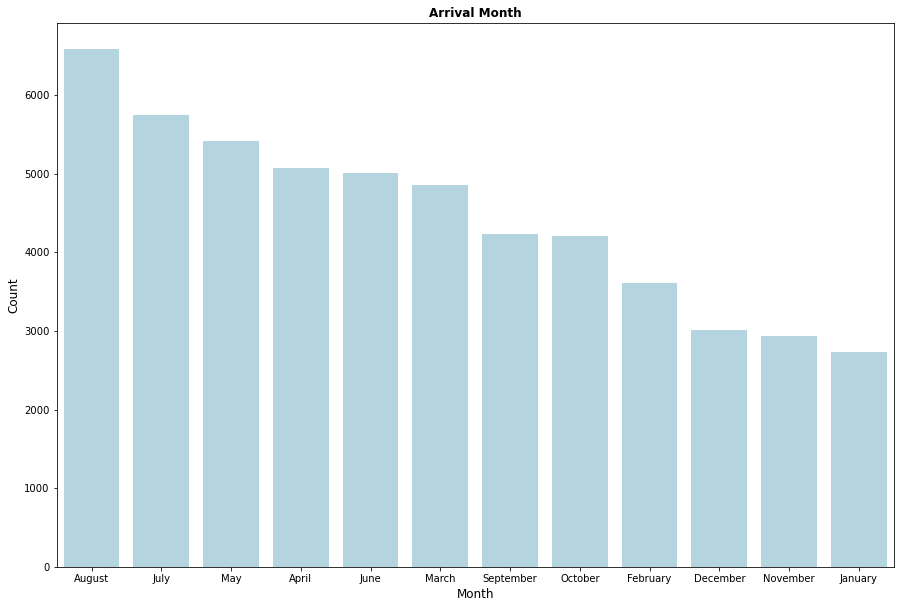

In [180]:
# Display arrival count by month 
plt.figure(figsize=(15,10))
sns.countplot(x='ArrivalDateMonth', data = bookings,
              order=pd.value_counts(bookings['ArrivalDateMonth']).index, color='lightblue')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [181]:
# Display relationship between StaysInWeekendNights & StaysInWeekNights columns
pd.crosstab(index = bookings['StaysInWeekNights'],columns=bookings['StaysInWeekendNights'], margins=True, margins_name = 'Total').iloc[:10]

StaysInWeekendNights,0,1,2,3,4,5,6,7,8,9,10,13,14,16,Total
StaysInWeekNights,,,,,,,,,,,,,,,
0,286,2406,1102,0,0,0,0,0,0,0,0,0,0,0,3794
1,7877,3134,3460,0,0,0,0,0,0,0,0,0,0,0,14471
2,6586,4493,3708,0,0,0,0,0,0,0,0,0,0,0,14787
3,5597,3408,2563,0,0,0,0,0,0,0,0,0,0,0,11568
4,2503,1222,1139,0,0,0,0,0,0,0,0,0,0,0,4864
5,395,506,1850,113,25,0,0,0,0,0,0,0,0,0,2889
6,0,0,253,63,43,0,0,0,0,0,0,0,0,0,359
7,0,0,111,59,23,0,0,0,0,0,0,0,0,0,193
8,0,0,89,34,32,0,0,0,0,0,0,0,0,0,155


In [182]:
# Create new feature: 'Weekend/Weekday' 
pd.options.mode.chained_assignment = None
def weekendOrWeekday(feature1, feature2, data_source):
    data_source['Weekend/Weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            bookings['Weekend/Weekday'].iloc[i] = 'WeekendOnly'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            bookings['Weekend/Weekday'].iloc[i] = 'WeekdaydOnly'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            bookings['Weekend/Weekday'].iloc[i] = 'Both'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            bookings['Weekend/Weekday'].iloc[i] = 'NoHistory'

            
weekendOrWeekday(bookings['StaysInWeekendNights'],bookings['StaysInWeekNights'], bookings)

Text(0, 0.5, 'Bookings')

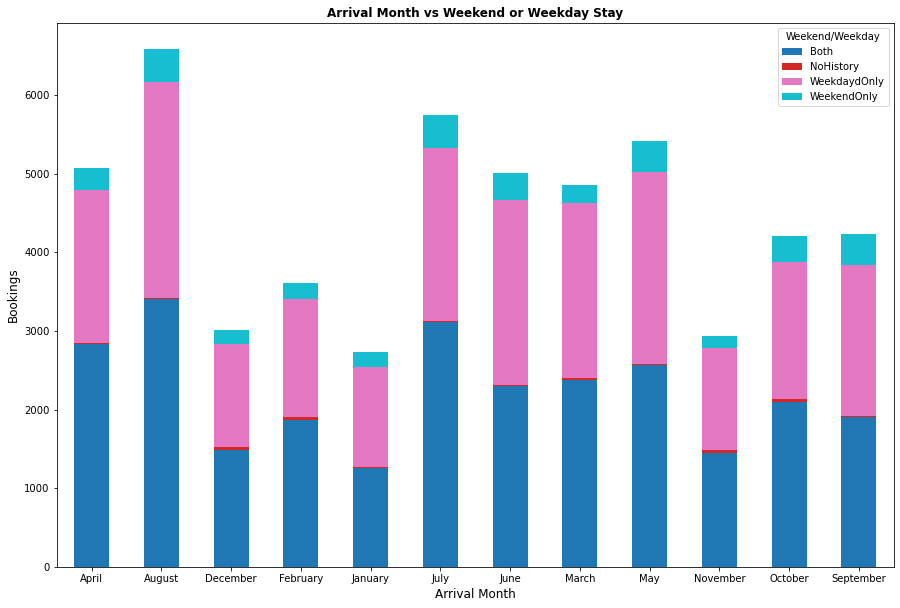

In [183]:
# Graph `ArrivalDateMonth` vs `Weekend/Weekday` 
groupData = bookings.groupby([ 'ArrivalDateMonth','Weekend/Weekday']).size().unstack(fill_value=0)
groupData.sort_values('ArrivalDateMonth', ascending = True).plot(kind='bar',stacked=True, cmap='tab10',figsize=(15,10))
plt.title('Arrival Month vs Weekend or Weekday Stay', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Bookings', fontsize=12)

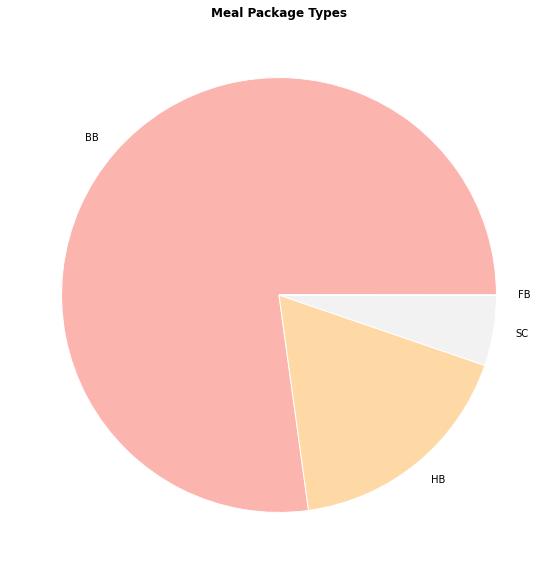

In [184]:
# Visualizing `meal` column data
mealLabels= ['BB','HB', 'SC', 'FB']
size = bookings['Meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel1")
colors = cmap(np.arange(3)*4)
plt.pie(size, labels=mealLabels, colors=colors, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
p=plt.gcf()
plt.title('Meal Package Types', weight='bold')
plt.show()

Text(0, 0.5, 'Count')

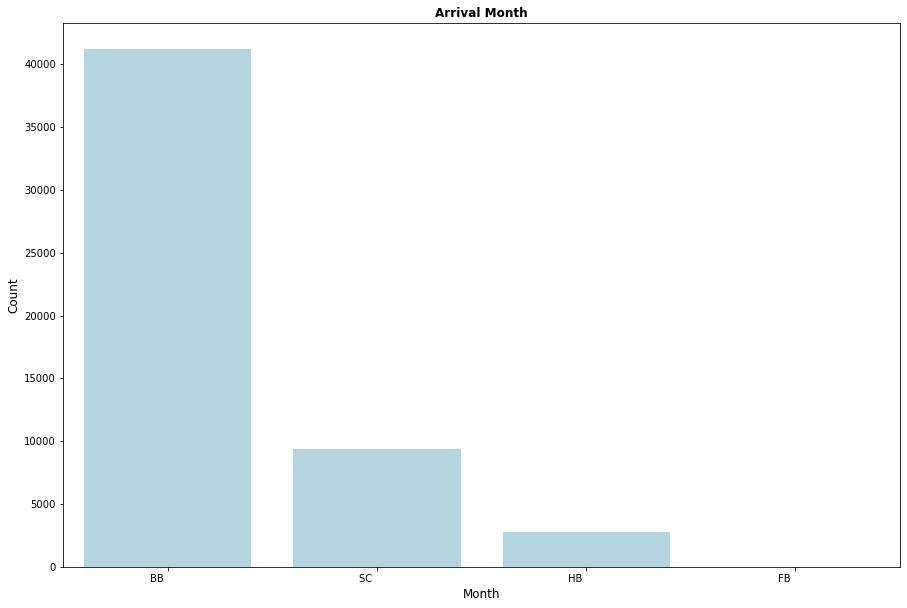

In [185]:
# Display count of meal type
plt.figure(figsize=(15,10))
sns.countplot(x='Meal', data = bookings,
              order=pd.value_counts(bookings['Meal']).index, color='lightblue')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Bookings')

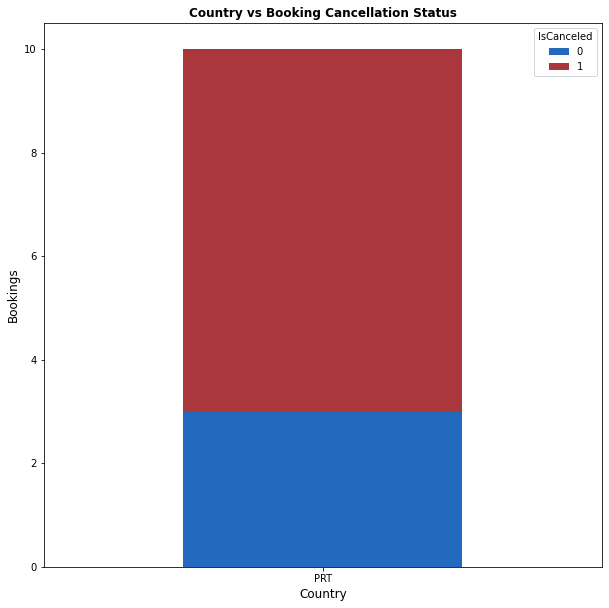

In [186]:
# Use groupby to see if number of special requests affects cancellation status
groupSpecRequest = bookings.groupby([bookings['Country'].iloc[:10], 'IsCanceled']).size().unstack(fill_value=0)
groupSpecRequest.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Country vs Booking Cancellation Status', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Bookings', fontsize=12)

In [187]:
bookings['Meal'].value_counts()

BB           41222
SC            9394
HB            2791
FB              11
Name: Meal, dtype: int64

In [188]:
#exploratory analysis
#Revenue Context

In [189]:
#Create Revenue Variables
bookings['TotalNights'] = bookings['StaysInWeekendNights'] + bookings['StaysInWeekNights']
bookings['TotalRevenue'] = bookings['ADR']*bookings['TotalNights']
bookings['TotalRevenueCanceled'] = bookings['ADR']*bookings['TotalNights']*bookings['IsCanceled']
bookings['TotalRevenueNotCanceled'] = bookings['TotalRevenue']-bookings['TotalRevenueCanceled']

In [190]:
#bookings['TotalRevenue'].sum()
#bookings['TotalRevenueCanceled'].sum()
bookings['TotalRevenueNotCanceled'].sum()

12159015.91

In [191]:
columns = ['MarketSegment','TotalRevenue','TotalRevenueCanceled','TotalRevenueNotCanceled']

bc = bookings[columns].groupby(["MarketSegment"])
bc.aggregate(np.sum)

,TotalRevenue,TotalRevenueCanceled,TotalRevenueNotCanceled
MarketSegment,,,
Aviation,83033.36,14065.00,68968.36
Complementary,2937.99,194.99,2743.00
Corporate,359997.16,52911.22,307085.94
Direct,1960059.51,420231.44,1539828.07
Groups,597534.52,184311.32,413223.20
Offline TA/TO,2029127.56,355053.67,1674073.89
Online TA,13739978.94,5586885.49,8153093.45


In [192]:
fig = px.pie(bookings, values='TotalRevenue', names='MarketSegment', title='Total Revenue per Market Segment', hole=.5)
fig.show()

In [198]:
bookings = bookings.drop(['TotalNights','TotalRevenue','TotalRevenueCanceled','TotalRevenueNotCanceled'], axis = 1)

In [199]:
#cancelation feature

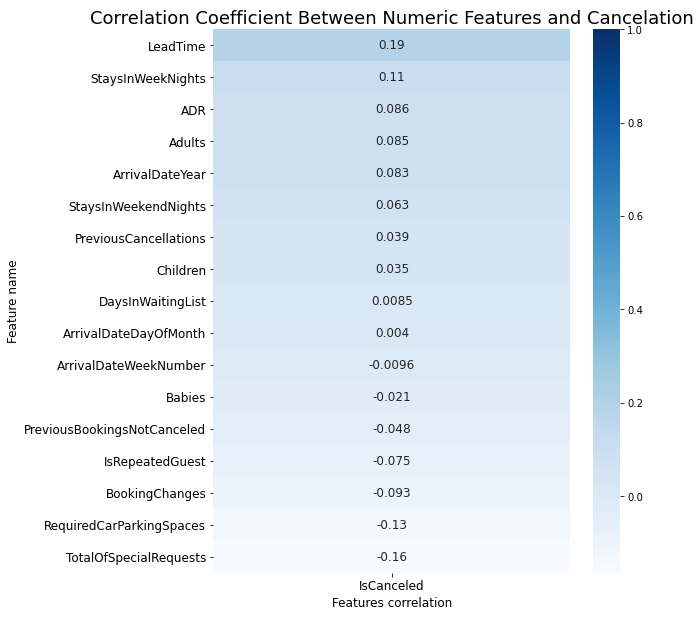

In [200]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(bookings.corr()[['IsCanceled']].sort_values('IsCanceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Numeric Features and Cancelation', fontsize=18)
ax.set_xlabel('Features correlation', fontsize = 12)
ax.set_ylabel('Feature name', fontsize = 12)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

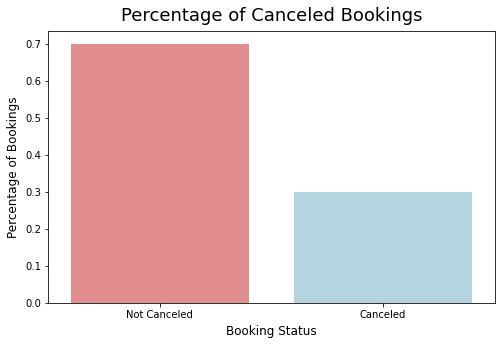

In [201]:
plt.figure(figsize=(8,5)) 
sns.barplot(x=bookings['IsCanceled'].unique(), y=bookings['IsCanceled'].value_counts(normalize=True), palette=['lightcoral', 'lightblue'])

plt.title("Percentage of Canceled Bookings", fontsize = 18, pad = 10)
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [203]:
#bookings['IsCanceled'].value_counts(normalize=True)

In [204]:
#Highly directed correlated features

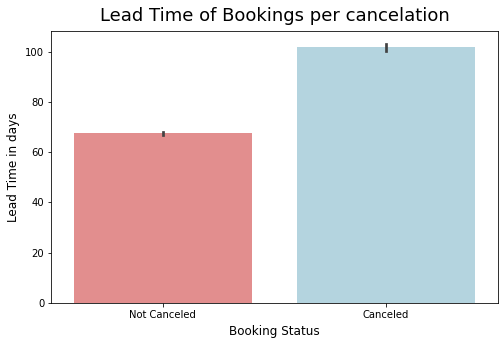

In [205]:
plt.figure(figsize=(8,5)) 
sns.barplot(x=bookings['IsCanceled'], y=bookings['LeadTime'], palette=['lightcoral', 'lightblue'])

plt.title("Lead Time of Bookings per cancelation", fontsize = 18, pad = 10)
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Lead Time in days", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

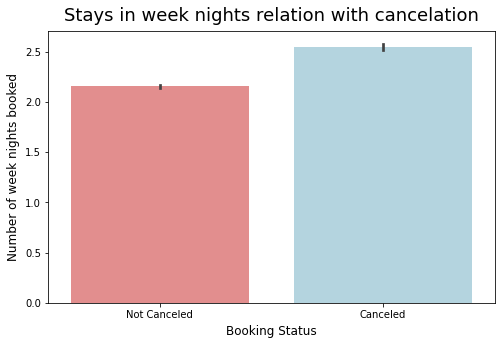

In [206]:
plt.figure(figsize=(8,5)) 
sns.barplot(x=bookings['IsCanceled'], y=bookings['StaysInWeekNights'], palette=['lightcoral', 'lightblue'])

plt.title("Stays in week nights relation with cancelation", fontsize = 18, pad = 10)
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Number of week nights booked", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

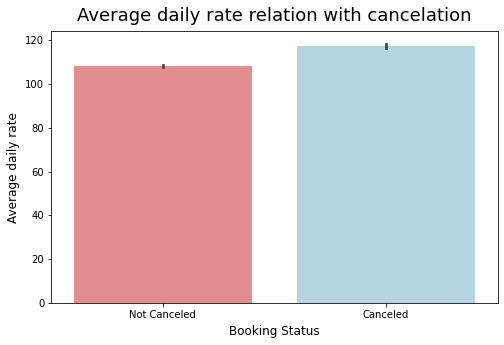

In [207]:
plt.figure(figsize=(8,5)) 
sns.barplot(x=bookings['IsCanceled'], y=bookings['ADR'], palette=['lightcoral', 'lightblue'])

plt.title("Average daily rate relation with cancelation", fontsize = 18, pad = 10)
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average daily rate", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

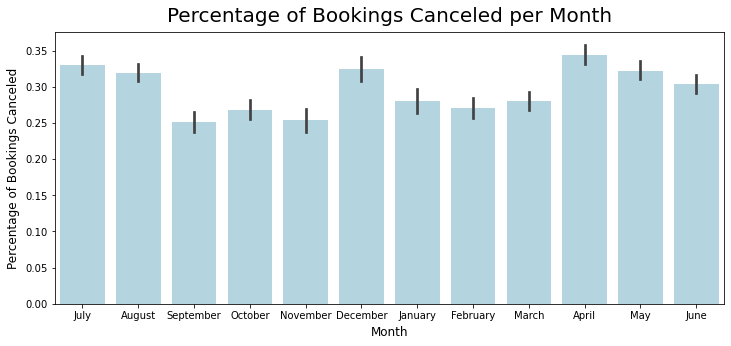

In [208]:
plt.figure(figsize=(12,5)) 
plt.title("Percentage of Bookings Canceled per Month", fontsize = 20, pad = 10)
sns.barplot(x=bookings['ArrivalDateMonth'], y=bookings['IsCanceled'], palette=['lightblue'])
plt.xlabel("Month", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

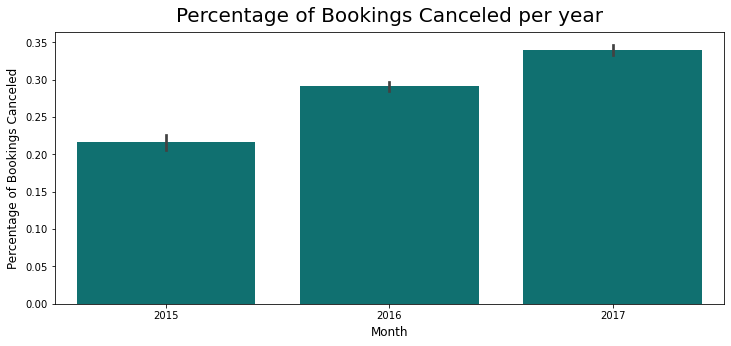

In [209]:
plt.figure(figsize=(12,5)) 
plt.title("Percentage of Bookings Canceled per year", fontsize = 20, pad = 10)
ax = sns.barplot(x=bookings['ArrivalDateYear'], y=bookings['IsCanceled'], palette=['teal'])
plt.xlabel("Month", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

In [210]:
#columns = ['ArrivalDateYear','IsCanceled']

#bc = bookings[columns].groupby(["ArrivalDateYear"])
#bc.aggregate(np.mean)

,IsCanceled
ArrivalDateYear,
2015,0.216381
2016,0.291038
2017,0.339895


In [211]:
#Highly inverse correlated features

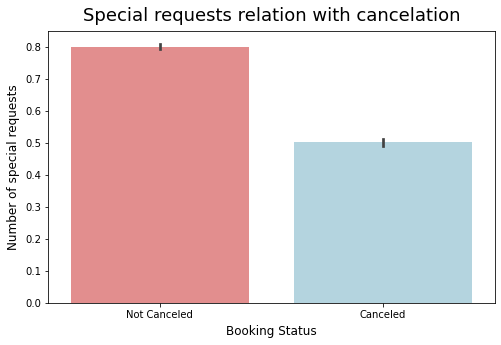

In [212]:
plt.figure(figsize=(8,5)) 
sns.barplot(x=bookings['IsCanceled'], y=bookings['TotalOfSpecialRequests'], palette=['lightcoral', 'lightblue'])

plt.title("Special requests relation with cancelation", fontsize = 18, pad = 10)
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Number of special requests", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

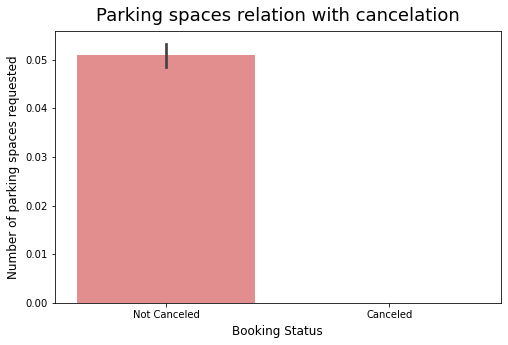

In [213]:
plt.figure(figsize=(8,5)) 
sns.barplot(x=bookings['IsCanceled'], y=bookings['RequiredCarParkingSpaces'], palette=['lightcoral', 'lightblue'])

plt.title("Parking spaces relation with cancelation", fontsize = 18, pad = 10)
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Number of parking spaces requested", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

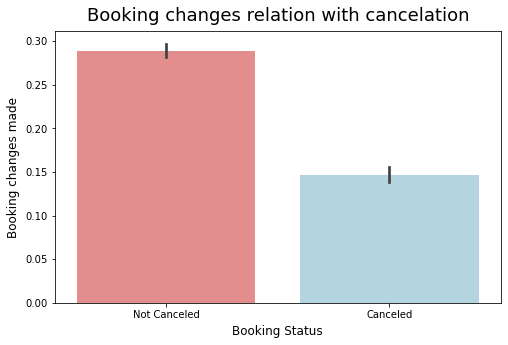

In [214]:
plt.figure(figsize=(8,5)) 
sns.barplot(x=bookings['IsCanceled'], y=bookings['BookingChanges'], palette=['lightcoral', 'lightblue'])

plt.title("Booking changes relation with cancelation", fontsize = 18, pad = 10)
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Booking changes made", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [215]:
#for non numerical variables

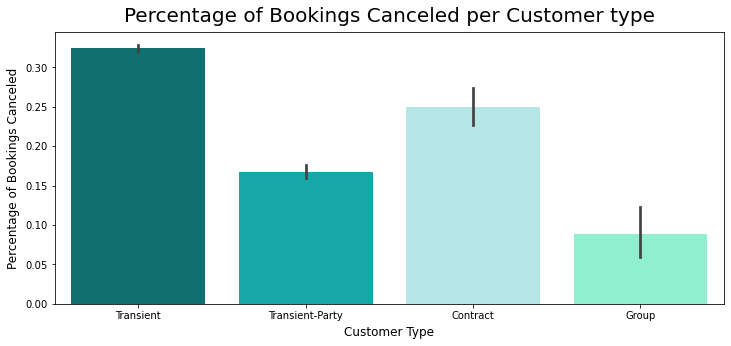

In [216]:
#Customer type
plt.figure(figsize=(12,5)) 
plt.title("Percentage of Bookings Canceled per Customer type", fontsize = 20, pad = 10)
sns.barplot(x=bookings['CustomerType'], y=bookings['IsCanceled'], palette=['teal','c','paleturquoise','aquamarine'])
plt.xlabel("Customer Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

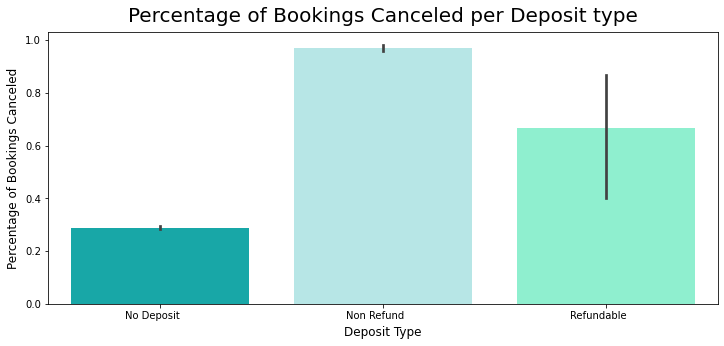

In [217]:
#Deposit type
plt.figure(figsize=(12,5)) 
plt.title("Percentage of Bookings Canceled per Deposit type", fontsize = 20, pad = 10)
sns.barplot(x=bookings['DepositType'], y=bookings['IsCanceled'], palette=['c','paleturquoise','aquamarine'])
plt.xlabel("Deposit Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

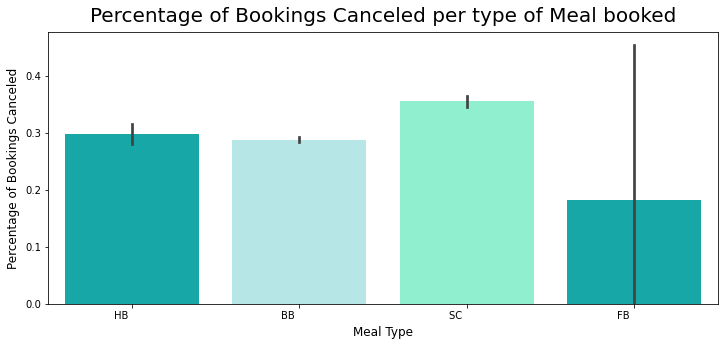

In [218]:
#Meal type booked
plt.figure(figsize=(12,5)) 
plt.title("Percentage of Bookings Canceled per type of Meal booked", fontsize = 20, pad = 10)
sns.barplot(x=bookings['Meal'], y=bookings['IsCanceled'], palette=['c','paleturquoise','aquamarine'])
plt.xlabel("Meal Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

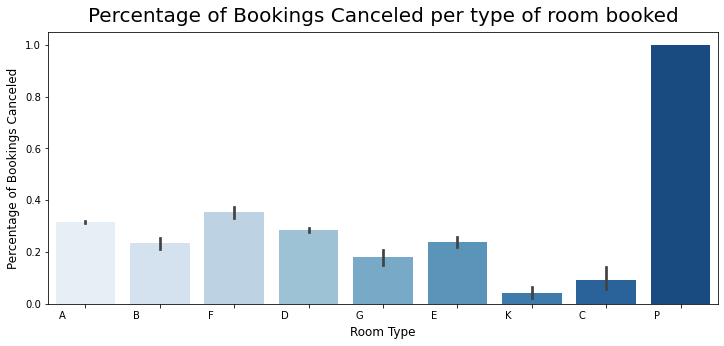

In [219]:
#Assigned Room type
plt.figure(figsize=(12,5)) 
plt.title("Percentage of Bookings Canceled per type of room booked", fontsize = 20, pad = 10)
sns.barplot(x=bookings['AssignedRoomType'], y=bookings['IsCanceled'], palette='Blues')
plt.xlabel("Room Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

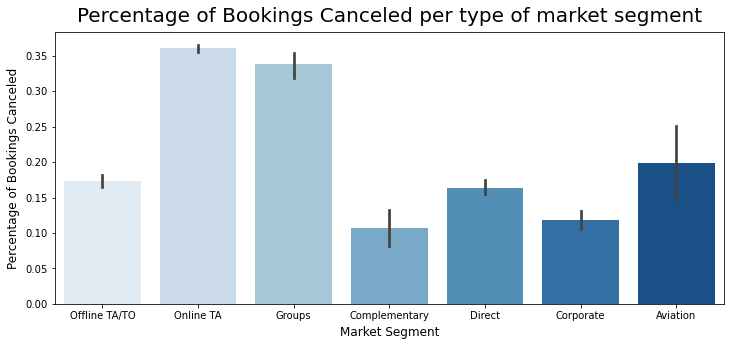

In [220]:
#For market segment
plt.figure(figsize=(12,5)) 
plt.title("Percentage of Bookings Canceled per type of market segment", fontsize = 20, pad = 10)
sns.barplot(x=bookings['MarketSegment'], y=bookings['IsCanceled'], palette='Blues')
plt.xlabel("Market Segment", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);